In [81]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime as dt
from talib import MA,STOCH
from mpl_finance import candlestick_ohlc
import pandas as pd

In [215]:
import inspect

In [218]:
inspect.getfullargspec(candlestick_ohlc)

FullArgSpec(args=['ax', 'quotes', 'width', 'colorup', 'colordown', 'alpha'], varargs=None, varkw=None, defaults=(0.2, 'k', 'r', 1.0), kwonlyargs=[], kwonlydefaults=None, annotations={})

In [82]:
data = pd.read_csv("SPY.csv")

In [83]:
df_plot = data[(data["Date"] >= "2018-01-01") & (data["Date"] <= '2018-12-31')].copy()

# Graph Plotting

In [84]:
df_plot["Date"] = df_plot['Date'].astype('datetime64[ns]') 
df_plot["Date"] = df_plot["Date"].map(mdates.date2num)
df_plot.head()

,Date,Open,High,Low,Close,Adj Close,Volume
6044,736696.0,2683.729980,2695.889893,2682.360107,2695.810059,2695.810059,3367250000
6045,736697.0,2697.850098,2714.370117,2697.770020,2713.060059,2713.060059,3538660000
6046,736698.0,2719.310059,2729.290039,2719.070068,2723.989990,2723.989990,3695260000
6047,736699.0,2731.330078,2743.449951,2727.919922,2743.149902,2743.149902,3236620000
6048,736702.0,2742.669922,2748.510010,2737.600098,2747.709961,2747.709961,3242650000


## Candlestick chart with 2 moving average lines, KD line, Volumn bar

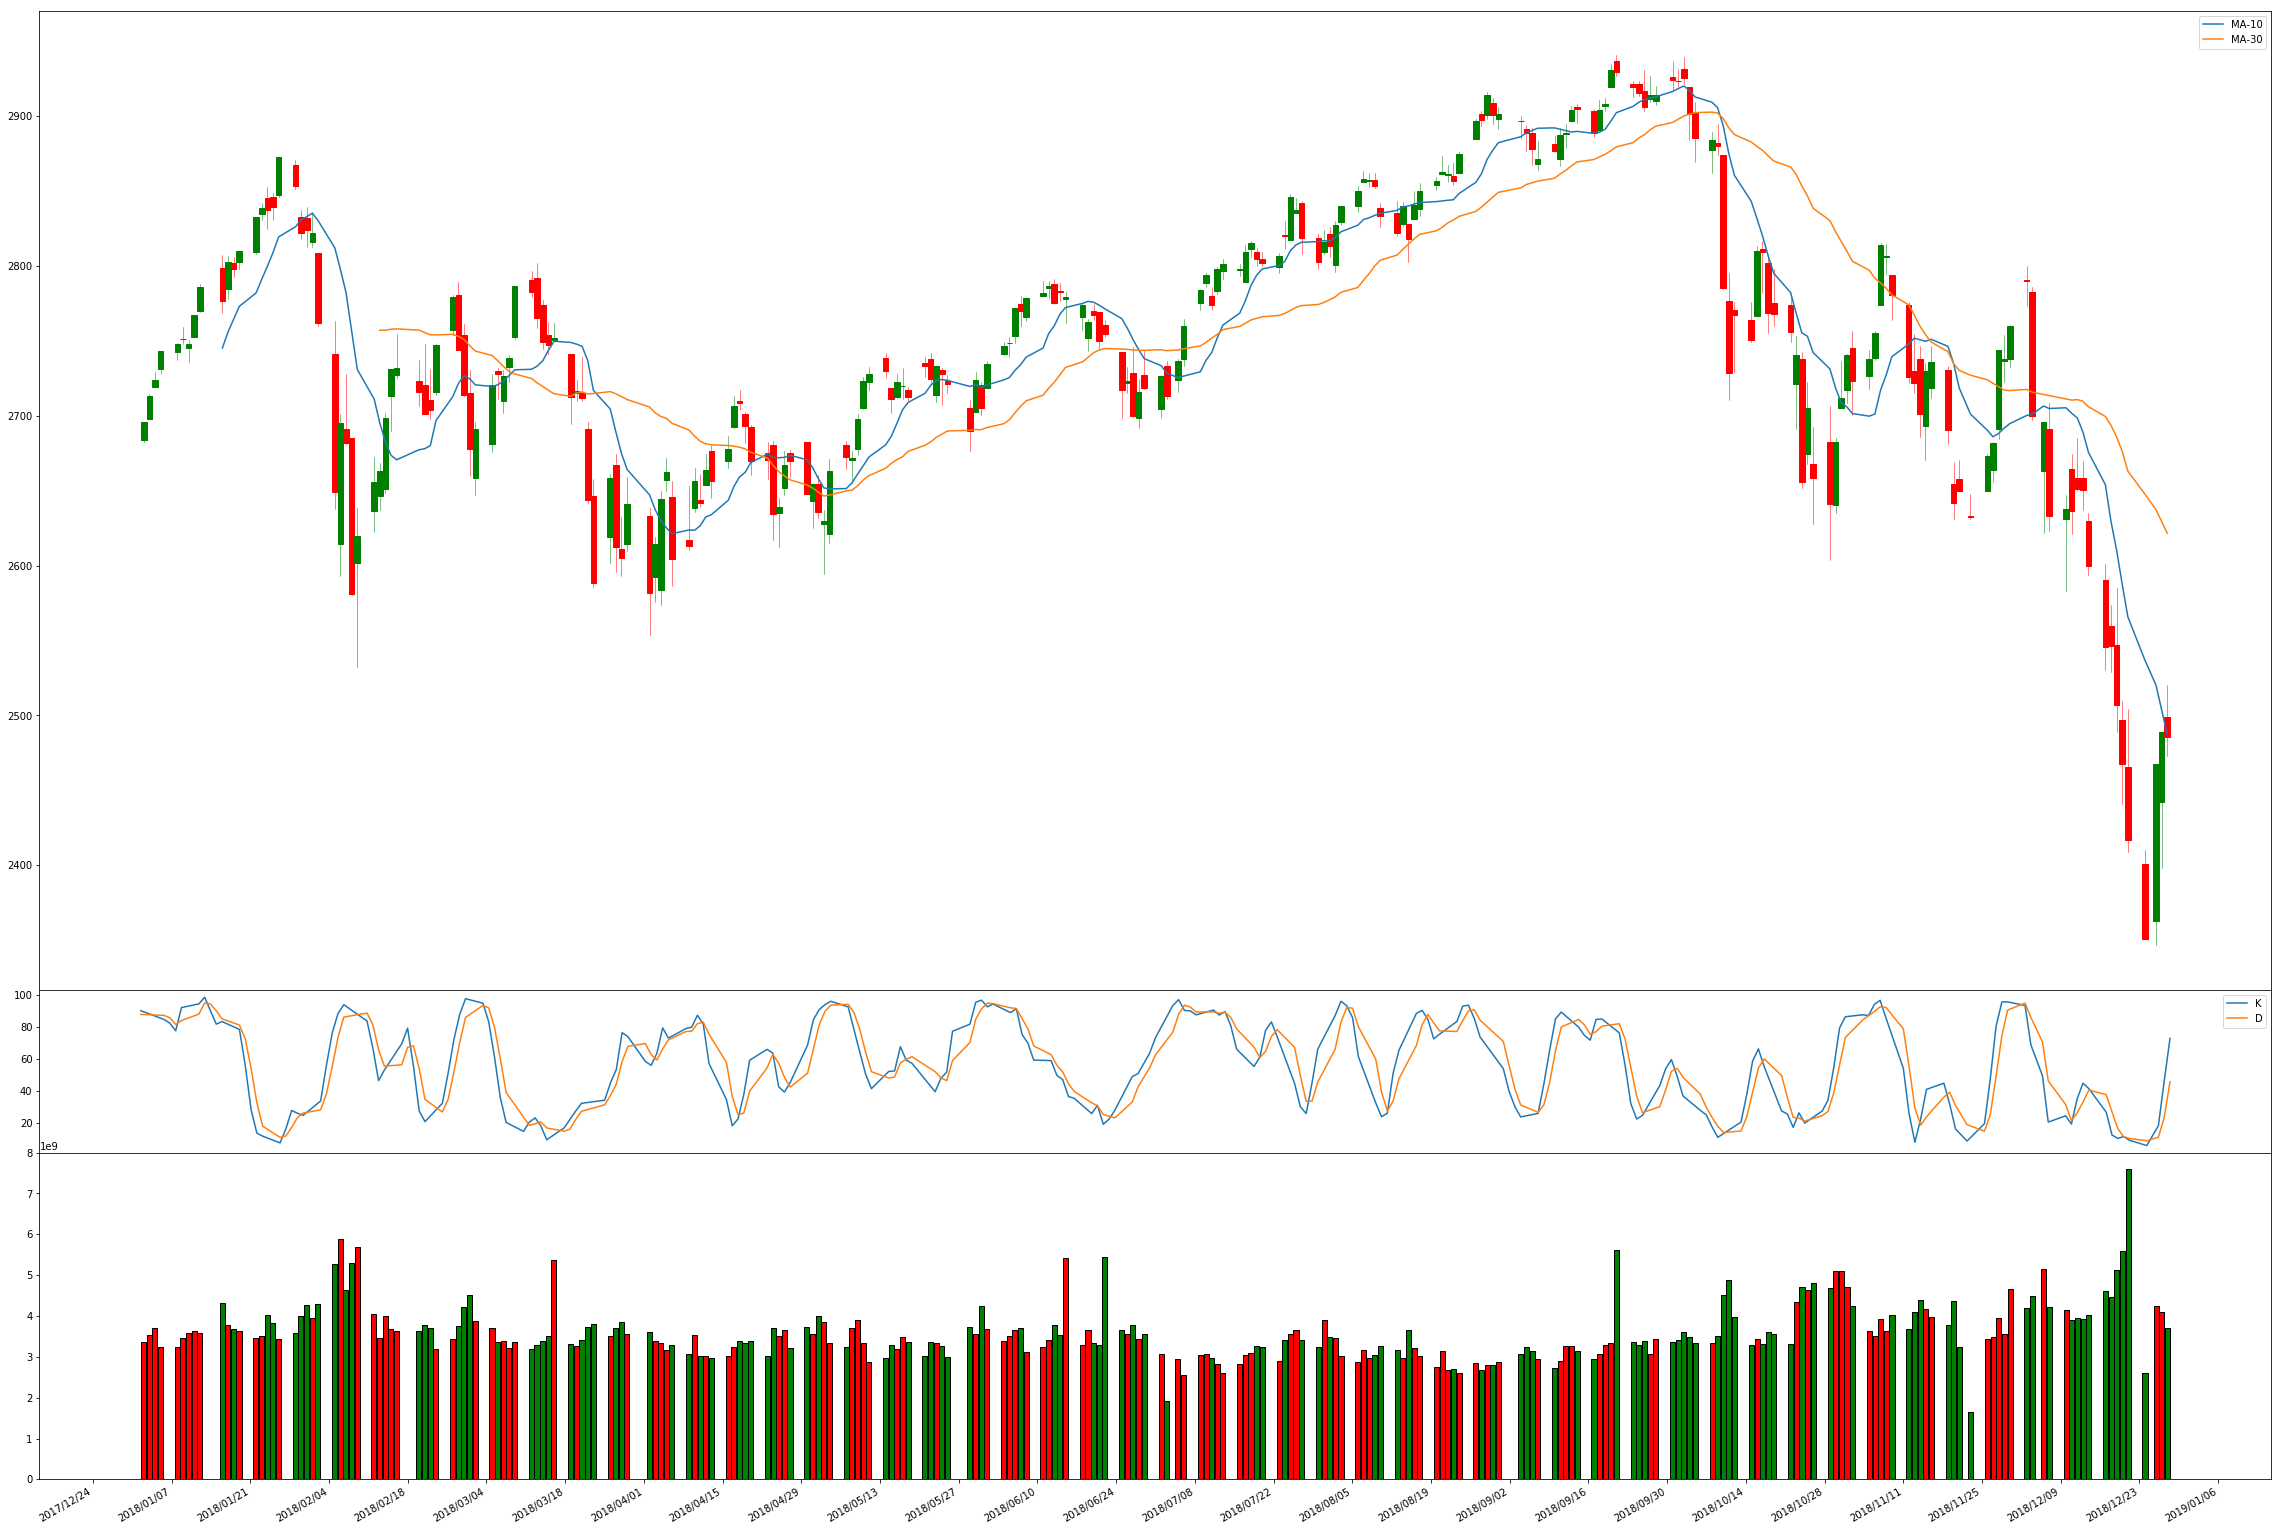

In [85]:
charts_plot, (ax, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(40,30), 
                                          gridspec_kw={'height_ratios': [3, 0.5, 1], 'hspace':0})
# candlestick
candlestick_ohlc(ax, df_plot.values, width=1, colorup='g', colordown='r')

ma_10_plot = MA( df_plot["Close"].values, timeperiod=10, matype=0)
ma_30_plot = MA( df_plot["Close"].values, timeperiod=30, matype=0)
# ma_10_plot = ma_10_plot[~np.isnan(ma_10_plot)]
# ma_30_plot = ma_30_plot[~np.isnan(ma_30_plot)]
ax.xaxis_date()

ax.plot(df_plot["Date"],ma_10_plot, label="MA-10")
ax.plot(df_plot["Date"],ma_30_plot, label="MA-30")
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
# ax.xaxis.set_major_locator(mdates.DayLocator(interval=30))
ax.legend()

# KD line
k_plot, d_plot = STOCH( df_plot["High"].values, 
                        df_plot["Low"].values, 
                        df_plot["Close"].values,fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
# ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
# ax2.xaxis.set_major_locator(mdates.DayLocator(interval=30))
ax2.plot(df_plot["Date"],k_plot, label="K")
ax2.plot(df_plot["Date"],d_plot, label="D")
ax2.legend()

# Volumn bar
pos = df_plot['Open']-df_plot['Close']>0
neg = df_plot['Open']-df_plot['Close']<0

ax3.bar(df_plot["Date"].values[pos], df_plot["Volume"].values[pos],color='green',width=0.9, edgecolor='black')
ax3.bar(df_plot["Date"].values[neg], df_plot["Volume"].values[neg],color='red',width=0.9, edgecolor='black')

ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=14))
charts_plot.autofmt_xdate()
# charts_plot.savefig('hw4_plot.png')
plt.show()


## K/D Line

In [6]:
k_plot, d_plot = STOCH( df_plot["High"].values, 
                        df_plot["Low"].values, 
                        df_plot["Close"].values,fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
# k_plot = k_plot[~np.isnan(k_plot)]
# d_plot = d_plot[~np.isnan(d_plot)]

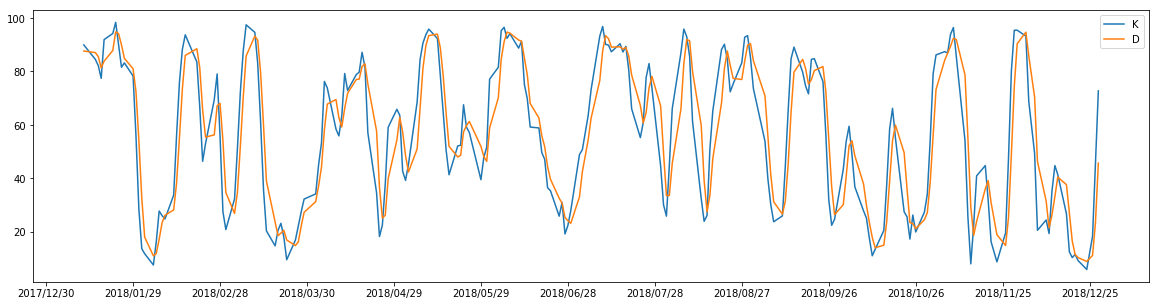

In [7]:
kd_plot, ax2 = plt.subplots(figsize=(20,5))

ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=30))
ax2.plot(df_plot["Date"],k_plot, label="K")
ax2.plot(df_plot["Date"],d_plot, label="D")
ax2.legend()
plt.show()

## Volume bar chart

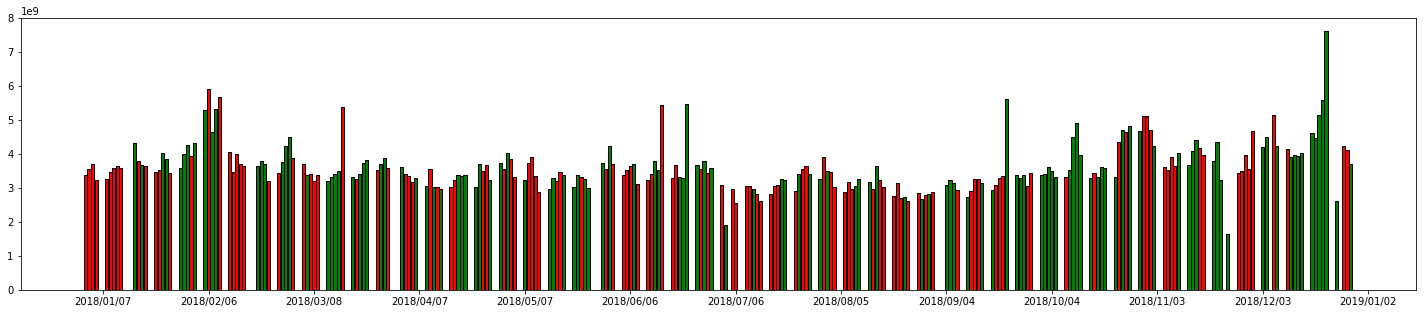

In [8]:
bar_plot, ax3 = plt.subplots(figsize=(25,5))

pos = df_plot['Open']-df_plot['Close']>0
neg = df_plot['Open']-df_plot['Close']<0

ax3.bar(df_plot["Date"].values[pos], df_plot["Volume"].values[pos],color='green',width=0.9, edgecolor='black')
ax3.bar(df_plot["Date"].values[neg], df_plot["Volume"].values[neg],color='red',width=0.9, edgecolor='black')

ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.show()

# Data preprocess

## Add technical analysis

In [86]:
df_train = data[ data["Date"]<'2017-01-01' ].copy()

ma_10_train = MA(df_train["Close"].values, timeperiod=10, matype=0)
ma_30_train = MA(df_train["Close"].values, timeperiod=30, matype=0)

k_train, d_train = STOCH( df_train["High"].values, 
                          df_train["Low"].values, 
                          df_train["Close"].values,fastk_period=5, 
                         slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)

df_train["MA10"] = ma_10_train
df_train["MA30"] = ma_30_train
df_train["K"] = k_train
df_train["D"] = d_train

df_validation = data[data["Date"] >= "2017-01-01"].copy()

ma_10_validation = MA(df_validation["Close"].values, timeperiod=10, matype=0)
ma_30_validation = MA(df_validation["Close"].values, timeperiod=30, matype=0)
k_validation, d_validation = STOCH( df_validation["High"].values, 
                                    df_validation["Low"].values, df_validation["Close"].values,
                                   fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
df_validation["MA10"] = ma_10_validation
df_validation["MA30"] = ma_30_validation
df_validation["K"] = k_validation
df_validation["D"] = d_validation

In [87]:
df_validation.shape

(501, 11)

## Drop dates and NaN

In [88]:
df_train = df_train.dropna()
df_train.drop(["Date"], axis=1, inplace=True)

df_validation = df_validation.dropna(axis=0)

df_validation["Date"] = df_validation["Date"].astype('datetime64[ns]') 
df_validation["Date"] = df_validation["Date"].map(mdates.date2num)

validation_date = df_validation["Date"].copy()

df_validation.drop(["Date"], axis=1, inplace=True)

In [89]:
df_validation.shape

(472, 10)

## Normalize data

In [90]:
def normalize(data_frame):
    df = data_frame.copy()
    
    return (df - df.min()) / (df.max() - df.min())

In [91]:
df_train = normalize(df_train)
df_validation = normalize(df_validation)

In [92]:
df_validation.shape

(472, 10)

In [93]:
df_train.head()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA30,K,D
29,0.018385,0.015501,0.018057,0.016374,0.016374,0.027292,0.016388,0.014552,0.224632,0.219862
30,0.016266,0.014410,0.016954,0.017056,0.017056,0.017371,0.015920,0.014622,0.314748,0.266260
31,0.016949,0.014879,0.018134,0.017083,0.017083,0.021693,0.015294,0.014712,0.365641,0.293013
32,0.016976,0.015654,0.018778,0.018333,0.018333,0.025504,0.014903,0.014817,0.622745,0.428313
33,0.018232,0.016063,0.019713,0.018480,0.018480,0.024513,0.014396,0.014914,0.726262,0.568167


## Prepare X_train, X_validation, y_train, y_validation for RNN

In [94]:
data_train = df_train.values
data_validation = df_validation.values

In [95]:
x_train, y_train, x_validation, y_validation = [], [], [], []

In [96]:
for i in range(30,data_train.shape[0]):
    x_train.append(data_train[i-30:i])
    y_train.append(data_train[i, 0])

for i in range(30,data_validation.shape[0]):
    x_validation.append(data_validation[i-30:i])
    y_validation.append(data_validation[i,0])

In [97]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_validation, y_validation = np.array(x_validation), np.array(y_validation)

In [98]:
x_train.shape
# y_train.shape

(5734, 30, 10)

# Building Models

In [99]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, SimpleRNN, GRU
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [110]:
early_stopping = EarlyStopping(monitor="val_loss", mode="min", patience=8)

In [46]:
def plotModelLoss(history):
    plt.figure(figsize=(15,8))
    plt.plot(history["loss"])
    plt.plot(history["val_loss"])
    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("Epoch")
    plt.legend(["Train", "Validation"], loc="upper left")
    plt.show()

In [47]:
def plotPrediction(model,name="Prediction by RNN"):
    y_pred = model.predict(x_validation)
    plt.figure(figsize=(20,10))
    plt.plot(validation_date[30:], y_validation)
    plt.plot(validation_date[30:], y_pred)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
    plt.gcf().autofmt_xdate()
    plt.title(name)
    plt.legend(["real", "predict"], loc="upper left")
    plt.show()


In [100]:
def result_plot(history, model, name):
    model_plot, ax4 = plt.subplots(nrows=1, ncols=2, figsize=(25, 7), gridspec_kw={'width_ratios': [1, 2]})
    y_pred = model.predict(x_validation)
    
    ax4[0].plot(history["loss"])
    ax4[0].plot(history["val_loss"])
    ax4[0].title.set_text("model loss")
    ax4[0].set_ylabel("loss")
    ax4[0].set_xlabel("Epoch")
    ax4[0].legend(["Train", "Validation"], loc="upper left")
    
    ax4[1].plot(validation_date[30:], y_validation)
    ax4[1].plot(validation_date[30:], y_pred)
    ax4[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
    ax4[1].xaxis.set_major_locator(mdates.DayLocator(interval=30))
    ax4[1].title.set_text(name)
    ax4[1].legend(["real", "predict"], loc="upper left")
    plt.setp(ax4[1].xaxis.get_majorticklabels(), rotation=30)
    model_plot.tight_layout()
#     model_plot.savefig('{}.png'.format(name))
    plt.show()

## Vanilla RNN

In [101]:
regressor_RNN = Sequential()
regressor_RNN.add(SimpleRNN(units = 32, activation = 'tanh', input_shape = (x_train.shape[1], x_train.shape[2])))
regressor_RNN.add(Dense(units = 1))

In [102]:
regressor_RNN.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 32)                1376      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,409
Trainable params: 1,409
Non-trainable params: 0
_________________________________________________________________


In [178]:
checkpoint_RNN = ModelCheckpoint(filepath="best_params_RNN.hdf5", monitor="val_loss",verbose=1,save_best_only=True)

In [103]:
regressor_RNN.compile(optimizer='adam', loss = 'mean_squared_error')

In [180]:
# regressor_RNN.load_weights("best_params_RNN.hdf5")

In [104]:
RNN_history = regressor_RNN.fit(x_train, y_train, epochs=256, batch_size=64, validation_data = (x_validation, y_validation) 
                                ,callbacks=[checkpoint_RNN, early_stopping])


Train on 5734 samples, validate on 442 samples
Epoch 1/256
5734/5734 [==============================] - 2s 311us/sample - loss: 0.0795 - val_loss: 0.0054
Epoch 2/256
5734/5734 [==============================] - 1s 135us/sample - loss: 0.0013 - val_loss: 0.0047
Epoch 3/256
5734/5734 [==============================] - 1s 123us/sample - loss: 7.7368e-04 - val_loss: 0.0040
Epoch 4/256
5734/5734 [==============================] - 1s 143us/sample - loss: 5.3624e-04 - val_loss: 0.0036
Epoch 5/256
5734/5734 [==============================] - 1s 129us/sample - loss: 3.9971e-04 - val_loss: 0.0032
Epoch 6/256
5734/5734 [==============================] - 1s 118us/sample - loss: 3.1517e-04 - val_loss: 0.0030
Epoch 7/256
5734/5734 [==============================] - 1s 117us/sample - loss: 2.6571e-04 - val_loss: 0.0029
Epoch 8/256
5734/5734 [==============================] - 1s 121us/sample - loss: 2.2864e-04 - val_loss: 0.0028
Epoch 9/256
5734/5734 [==============================] - 1s 124us/sample 

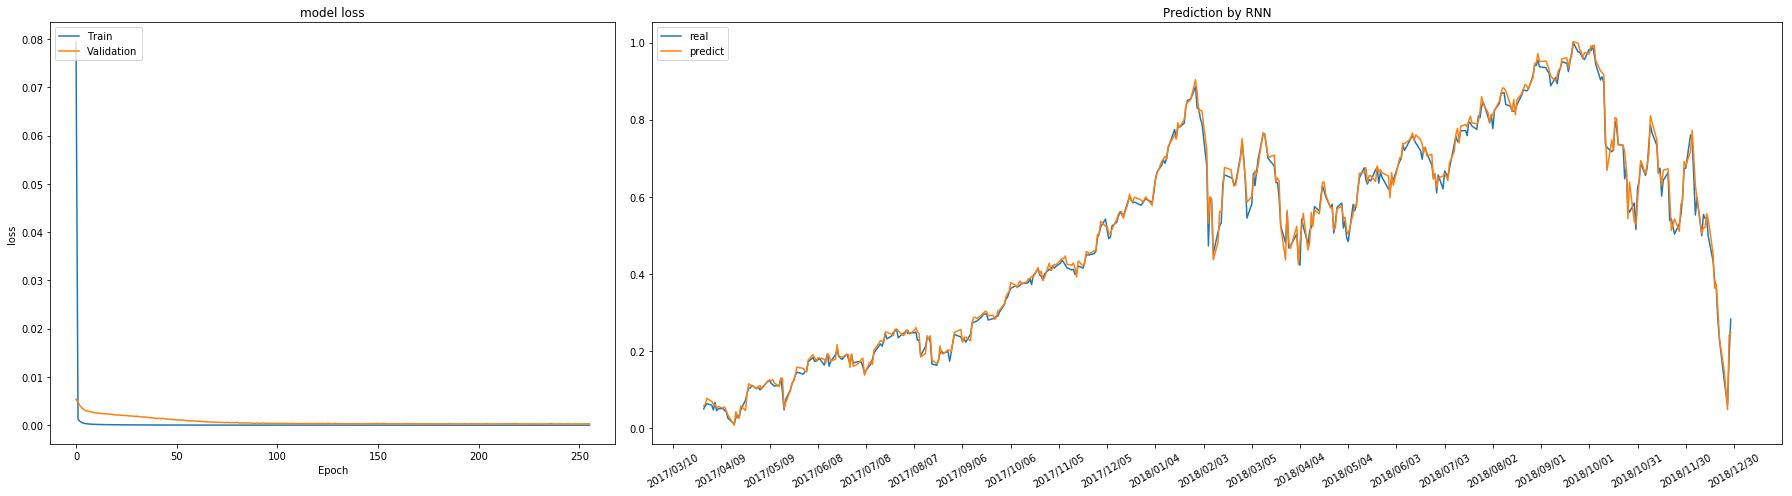

In [105]:
result_plot(RNN_history.history, regressor_RNN, 'Prediction by RNN')

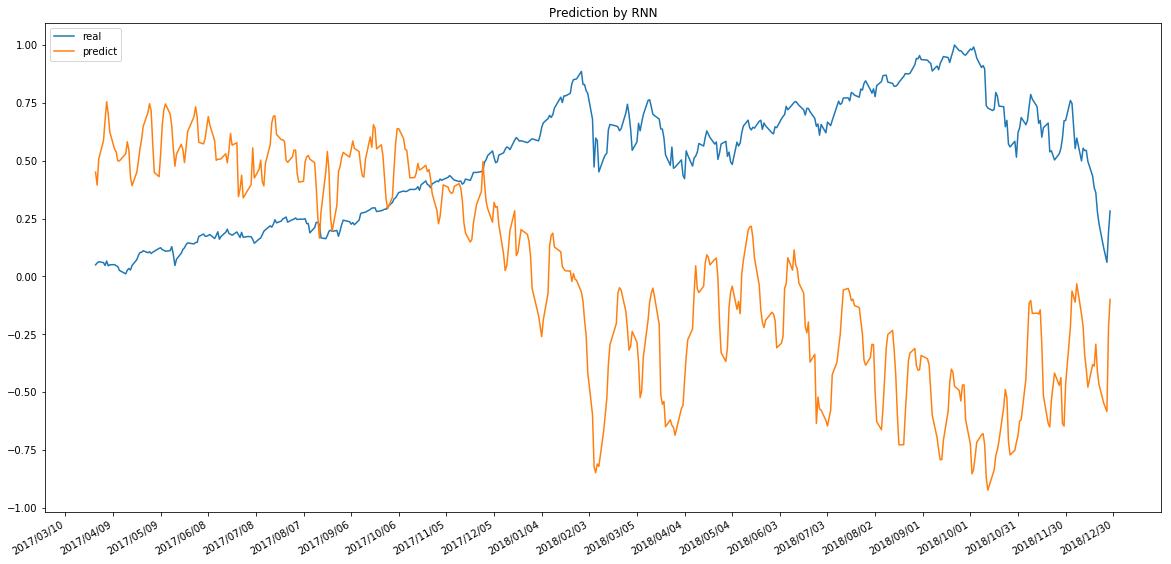

In [374]:
plotModelLoss(RNN_history.history)
plotPrediction(regressor_RNN)

## LSTM 

In [106]:
regressor_LSTM = Sequential()
regressor_LSTM.add(LSTM(units = 32, activation = 'tanh', input_shape = (x_train.shape[1], x_train.shape[2])))
regressor_LSTM.add(Dense(units = 1))

In [402]:
regressor_LSTM.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 32)                5504      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 5,537
Trainable params: 5,537
Non-trainable params: 0
_________________________________________________________________


In [44]:
checkpoint_LSTM = ModelCheckpoint(filepath="best_params_LSTM.hdf5", monitor="val_loss",verbose=1,save_best_only=True)

In [107]:
regressor_LSTM.compile(optimizer='adam', loss = 'mean_squared_error')

In [111]:
LSTM_history = regressor_LSTM.fit(x_train, y_train, epochs=128, batch_size=64, validation_data = (x_validation, y_validation)
                                  ,callbacks=[early_stopping])

Train on 5734 samples, validate on 442 samples
Epoch 1/128
5734/5734 [==============================] - 4s 648us/sample - loss: 0.0090 - val_loss: 0.0042
Epoch 2/128
5734/5734 [==============================] - 1s 188us/sample - loss: 1.9957e-04 - val_loss: 0.0031
Epoch 3/128
5734/5734 [==============================] - 1s 211us/sample - loss: 1.1580e-04 - val_loss: 0.0029
Epoch 4/128
5734/5734 [==============================] - 1s 224us/sample - loss: 9.3138e-05 - val_loss: 0.0028
Epoch 5/128
5734/5734 [==============================] - 1s 202us/sample - loss: 8.1840e-05 - val_loss: 0.0029
Epoch 6/128
5734/5734 [==============================] - 1s 190us/sample - loss: 7.2215e-05 - val_loss: 0.0027
Epoch 7/128
5734/5734 [==============================] - 1s 186us/sample - loss: 6.5158e-05 - val_loss: 0.0026
Epoch 8/128
5734/5734 [==============================] - 1s 211us/sample - loss: 6.1362e-05 - val_loss: 0.0026
Epoch 9/128
5734/5734 [==============================] - 1s 194us/sam

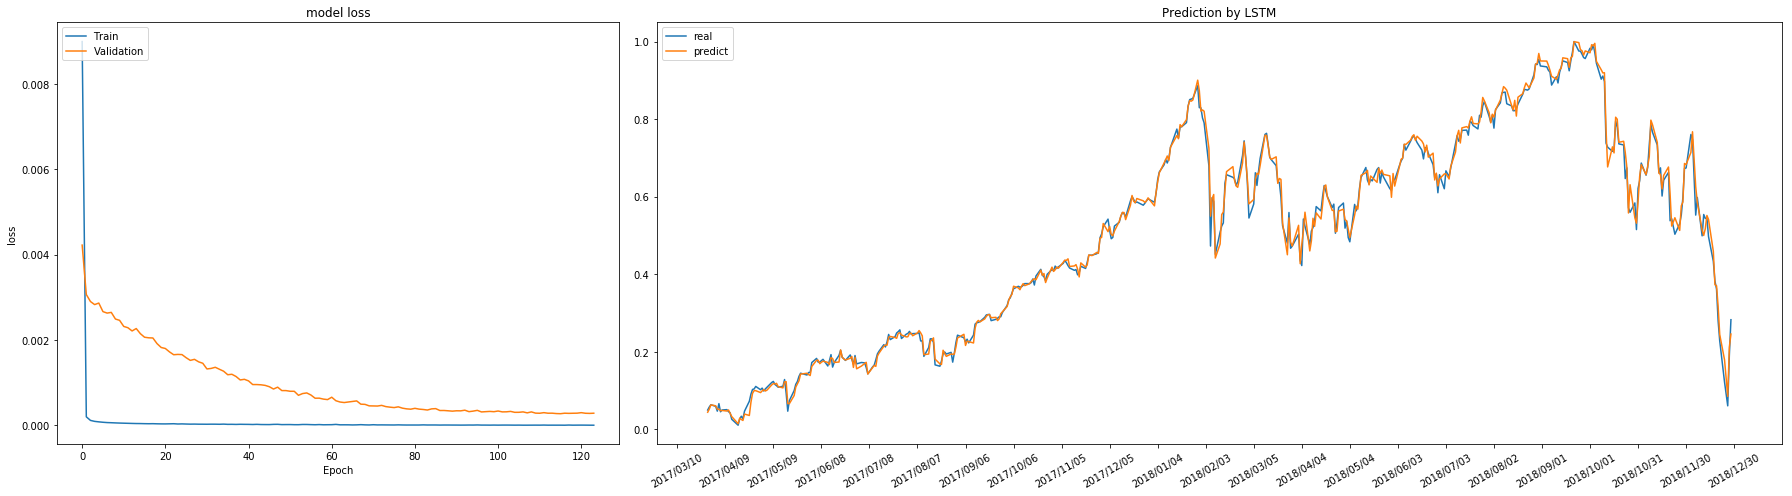

In [112]:
result_plot(LSTM_history.history, regressor_LSTM, name="Prediction by LSTM")

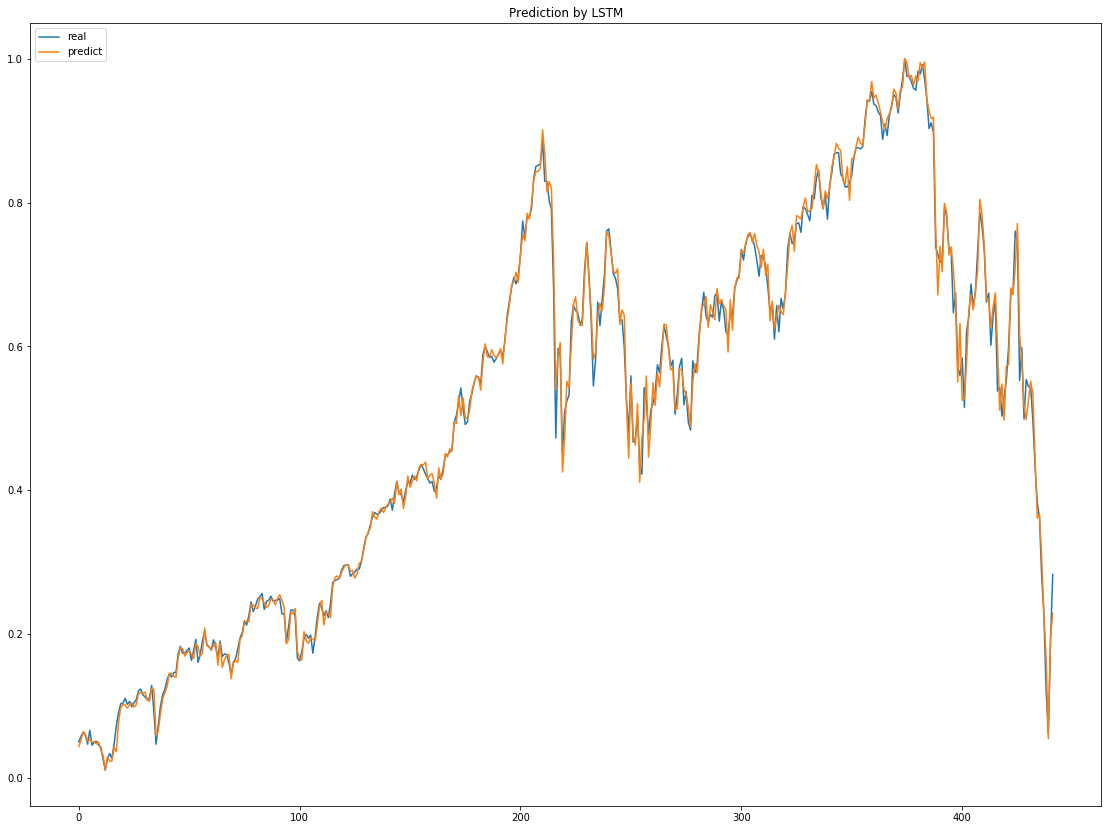

In [50]:
plotModelLoss(LSTM_history.history)
plotPrediction(regressor_LSTM, name="Prediction by LSTM")

## GRU

In [113]:
regressor_GRU = Sequential()
regressor_GRU.add(GRU(units = 32, activation = 'tanh', input_shape = (x_train.shape[1], x_train.shape[2])))
regressor_GRU.add(Dense(units = 1))

In [406]:
regressor_GRU.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 32)                4224      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 4,257
Trainable params: 4,257
Non-trainable params: 0
_________________________________________________________________


In [53]:
checkpoint_GRU = ModelCheckpoint(filepath="best_params_GRU.hdf5", monitor="val_loss",verbose=1,save_best_only=True)

In [114]:
regressor_GRU.compile(optimizer='adam', loss = 'mean_squared_error')

In [117]:
GRU_history = regressor_GRU.fit(x_train, y_train, epochs=128, batch_size=64, validation_data = (x_validation, y_validation)
                                ,callbacks=[early_stopping])

Train on 5734 samples, validate on 442 samples
Epoch 1/128
5734/5734 [==============================] - 1s 205us/sample - loss: 4.0675e-06 - val_loss: 3.8570e-04
Epoch 2/128
5734/5734 [==============================] - 1s 206us/sample - loss: 4.6346e-06 - val_loss: 3.8214e-04
Epoch 3/128
5734/5734 [==============================] - 1s 209us/sample - loss: 3.9942e-06 - val_loss: 3.4791e-04
Epoch 4/128
5734/5734 [==============================] - 1s 229us/sample - loss: 4.9495e-06 - val_loss: 3.5810e-04
Epoch 5/128
5734/5734 [==============================] - 1s 205us/sample - loss: 4.3806e-06 - val_loss: 4.0394e-04
Epoch 6/128
5734/5734 [==============================] - 1s 196us/sample - loss: 3.5621e-06 - val_loss: 3.8128e-04
Epoch 7/128
5734/5734 [==============================] - 1s 225us/sample - loss: 3.5840e-06 - val_loss: 3.3417e-04
Epoch 8/128
5734/5734 [==============================] - 1s 211us/sample - loss: 4.4661e-06 - val_loss: 3.6393e-04
Epoch 9/128
5734/5734 [==========

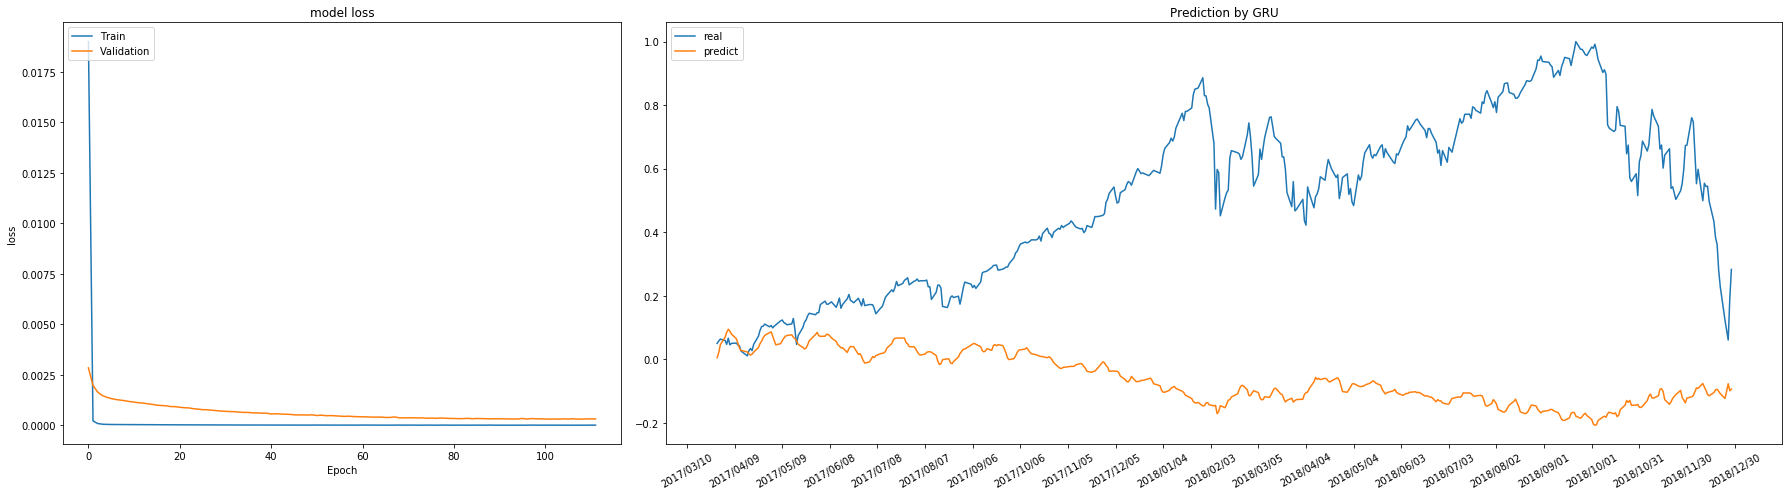

In [418]:
result_plot(GRU_history.history, regressor_GRU, name="Prediction by GRU")

In [80]:
plotModelLoss(GRU_history.history)
plotPrediction(regressor_GRU, name="Prediction by GRU")

NameError: name 'GRU_history' is not defined